# About The Dataset

#### **1.Show_id:** A unique ID for a movie or series. Each movie or series in the dataset is assigned a unique number.
 
#### **2.Type:** The type of movie or series. For example, it contains values ​​such as "Movie" or "TV Show".

####  **3.Title:** The title of the movie or series. It indicates the name displayed to the user.

#### **4.Director:** The director of the movie or series. It contains the names of the person or people who directed the production.

#### **5.Cast:** A list of actors in the movie or series. The names of the actors playing the main characters are listed.

#### **6.Country:** The country or countries where the movie or series was made. It indicates the country in which the production was shot.

####  **7.Date_added:** The date it was added to Netflix. It indicates the date on which the movie or series joined the platform.

####  **8.Release_year:** The year the movie or series was released. It indicates the year the production first reached its audience.

#### **9.Rating:** The rating of the movie or series according to the audience. It is often evaluated together with the age classification (for example, PG-13, R).

#### **10.Duration:** The duration of the movie or series. Indicates the total running time in minutes for a movie or the total season running time for a series.

#### **11.Listed_in:** The categories the movie or series falls into. For example, it includes genres such as "Action", "Drama", "Comedy".

#### **12.Description:** A short description of the movie or series. It gives viewers information about the production's plot.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


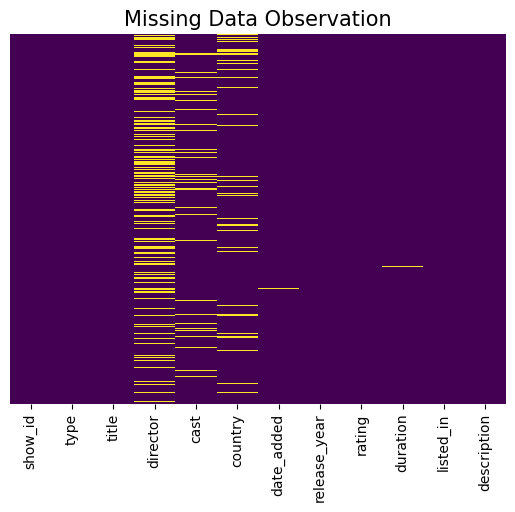

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.title("Missing Data Observation", fontsize = 15)
plt.show()

In [9]:
type_value = df['type'].value_counts()

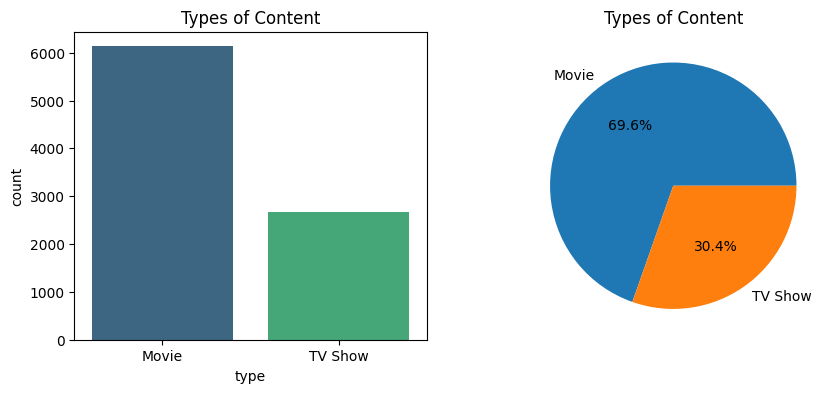

In [10]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.countplot(data = df, x = 'type', palette = 'viridis', ax = axes[0])
axes[0].set_title('Types of Content')


axes[1].pie(type_value, labels = type_value.index, autopct = '%1.1f%%')
axes[1].set_title('Types of Content')
plt.show()

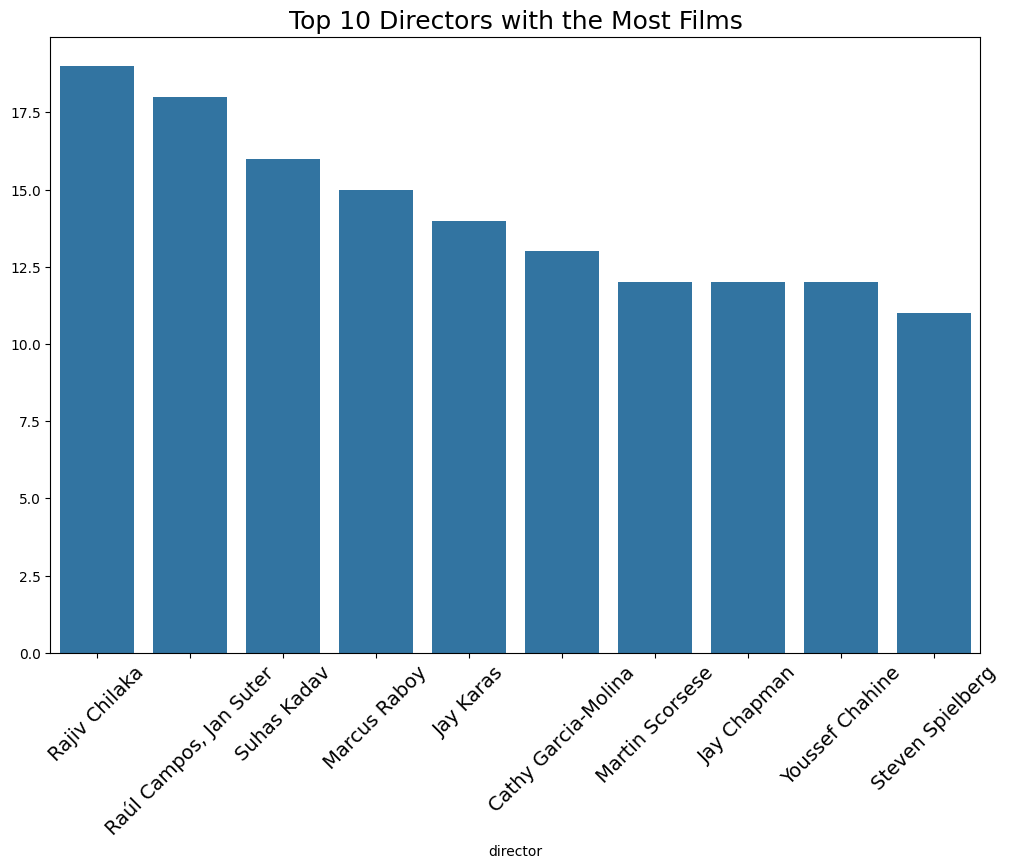

In [11]:
director_film = df[df["type"] == "Movie"]["director"].value_counts()[:10]

plt.figure(figsize = (12,8))
sns.barplot(x = director_film.index, y = director_film.values)
plt.xticks(rotation = 45, fontsize = 14)
plt.title("Top 10 Directors with the Most Films",fontsize = 18)
plt.show()

In [12]:
top10_country = df['country'].value_counts().nlargest(10)
top10_country

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

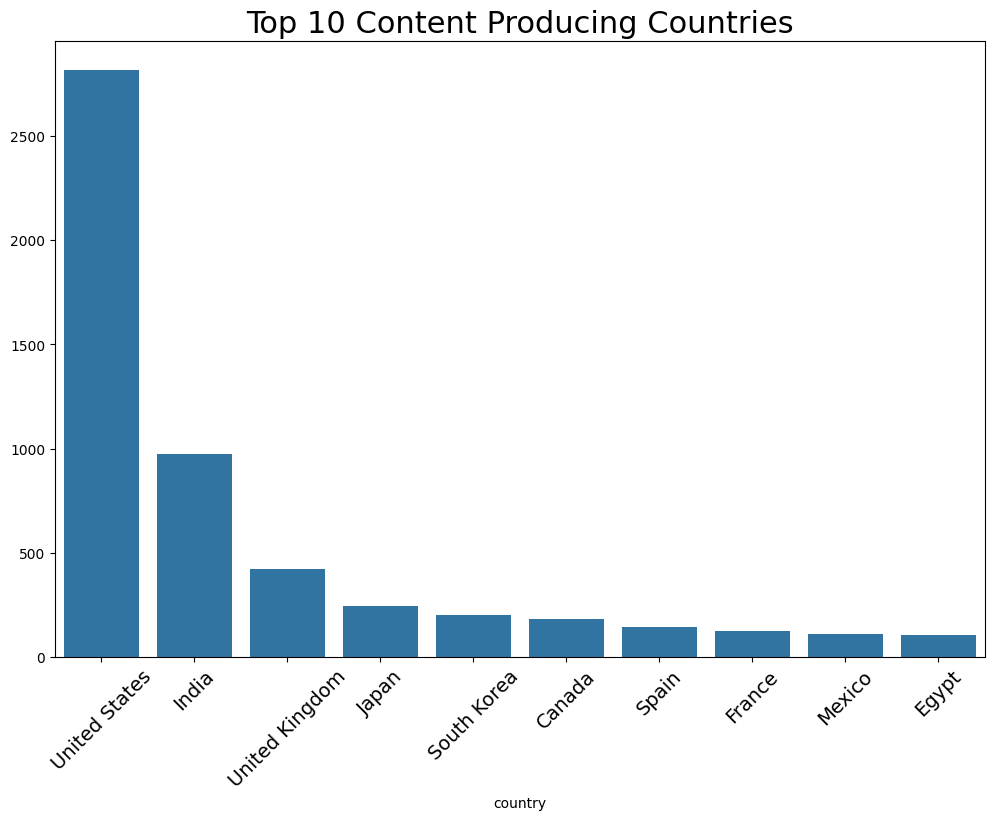

In [13]:
plt.figure(figsize = (12,8))
sns.barplot(x = top10_country.index, y = top10_country.values)
plt.title("Top 10 Content Producing Countries", fontsize = 22)
plt.xticks(rotation = 45, fontsize = 14)
plt.show()

In [14]:
import folium
import numpy as np

top10_country = {
    'United States': {'count': 2818, 'coords': [37.0902, -95.7129]},
    'India': {'count': 972, 'coords': [20.5937, 78.9629]},
    'United Kingdom': {'count': 419, 'coords': [51.5074, -0.1278]},
    'Japan': {'count': 245, 'coords': [36.2048, 138.2529]},
    'South Korea': {'count': 199, 'coords': [35.9078, 127.7669]},
    'Canada': {'count': 181, 'coords': [56.1304, -106.3468]},
    'Spain': {'count': 145, 'coords': [40.4637, -3.7492]},
    'France': {'count': 124, 'coords': [46.6034, 1.8883]},
    'Mexico': {'count': 110, 'coords': [23.6345, -102.5528]},
    'Egypt': {'count': 106, 'coords': [26.8206, 30.8025]},
    'Turkey': {'count': 105, 'coords': [38.9637, 35.2433]},
    'Nigeria': {'count': 95, 'coords': [9.082, 8.6753]},
    'Australia': {'count': 87, 'coords': [-25.2744, 133.7751]},
    'Taiwan': {'count': 81, 'coords': [23.6978, 120.9605]},
    'Indonesia': {'count': 79, 'coords': [-0.7893, 113.9213]},
    'Brazil': {'count': 77, 'coords': [-14.2350, -51.9253]},
    'Philippines': {'count': 75, 'coords': [12.8797, 121.7740]},
    'United Kingdom, United States': {'count': 75, 'coords': [51.5074, -0.1278]}, 
    'United States, Canada': {'count': 73, 'coords': [56.1304, -106.3468]}, 
    'Germany': {'count': 67, 'coords': [51.1657, 10.4515]},
}


cl = [
    [0.0, 'rgb(248,255,206)'],
    [0.2, 'rgb(203,255,205)'],
    [0.4, 'rgb(155,255,164)'],
    [0.6, 'rgb(79,255,178)'],
    [0.8, 'rgb(15,183,132)'],
    [1, '#008059']
]


m = folium.Map(location=[20, 0], zoom_start=2)


max_count = max([data['count'] for data in top10_country.values()])


for country, data in top10_country.items():
    coords = data['coords']
    count = data['count']
    
    normalized_count = count / max_count  
    
  
    color_idx = int(normalized_count * (len(cl) - 1))
    color = cl[color_idx][1]  
    
    folium.Marker(
        location=coords,
        popup=f'{country}: {count}',
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(m)


m.save("top10_countries_map_with_custom_markers.html")
m

# Since the maps are not visible on github, we added the image as a photo.

![image (21).png](<attachment:image (21).png>)
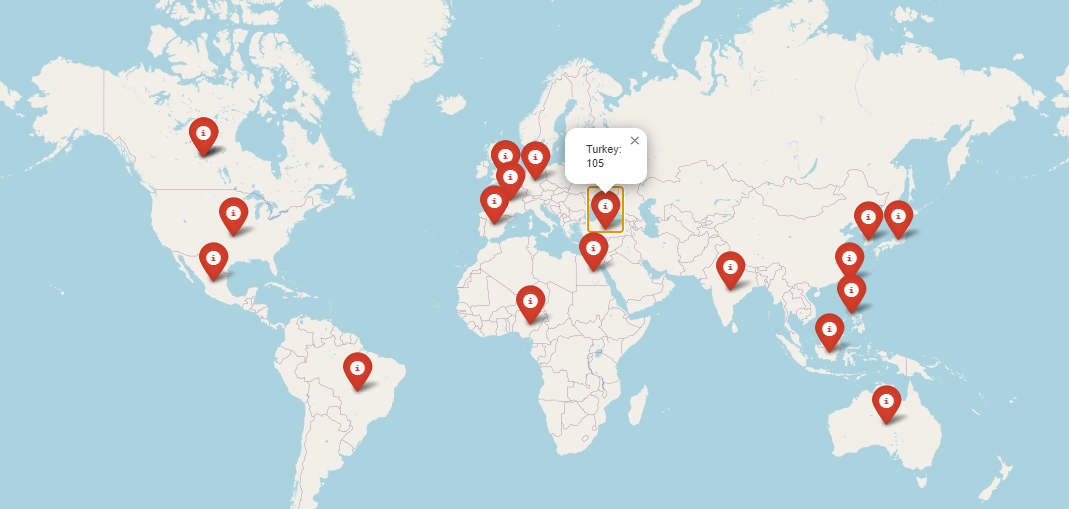

In [96]:
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

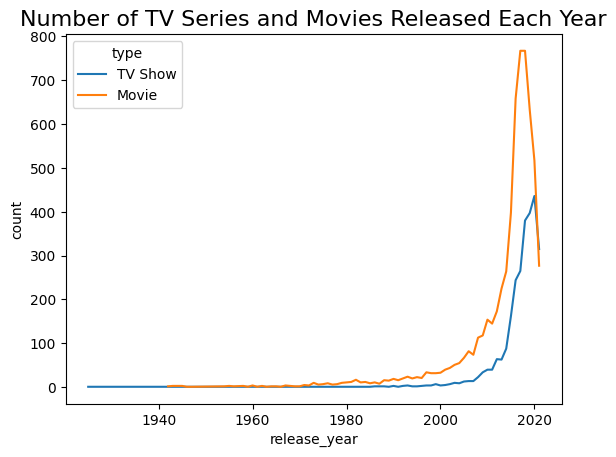

In [82]:
release_counts = df.groupby(["release_year", "type"]).size().reset_index(name="count")

sns.lineplot(data=release_counts, x="release_year", y="count", hue="type")
plt.title("Number of TV Series and Movies Released Each Year", fontsize = 16)
plt.show()

In [83]:
df['year_added'] = df['year_added'].fillna(0).astype(int)

print(df['year_added'].dtype)


int64


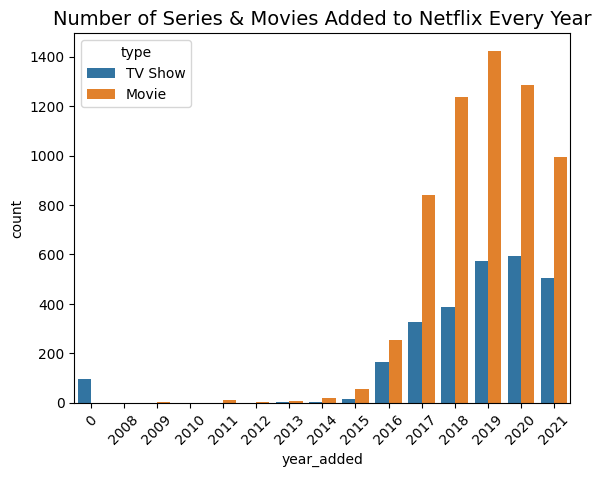

In [84]:
content_counts = df.groupby(["year_added", "type"]).size().reset_index(name = "count")

sns.barplot(x = "year_added", y = "count", data = content_counts, hue = "type")
plt.xticks(rotation = 45)
plt.title("Number of Series & Movies Added to Netflix Every Year",fontsize = 14)
plt.show()

In [85]:
df["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

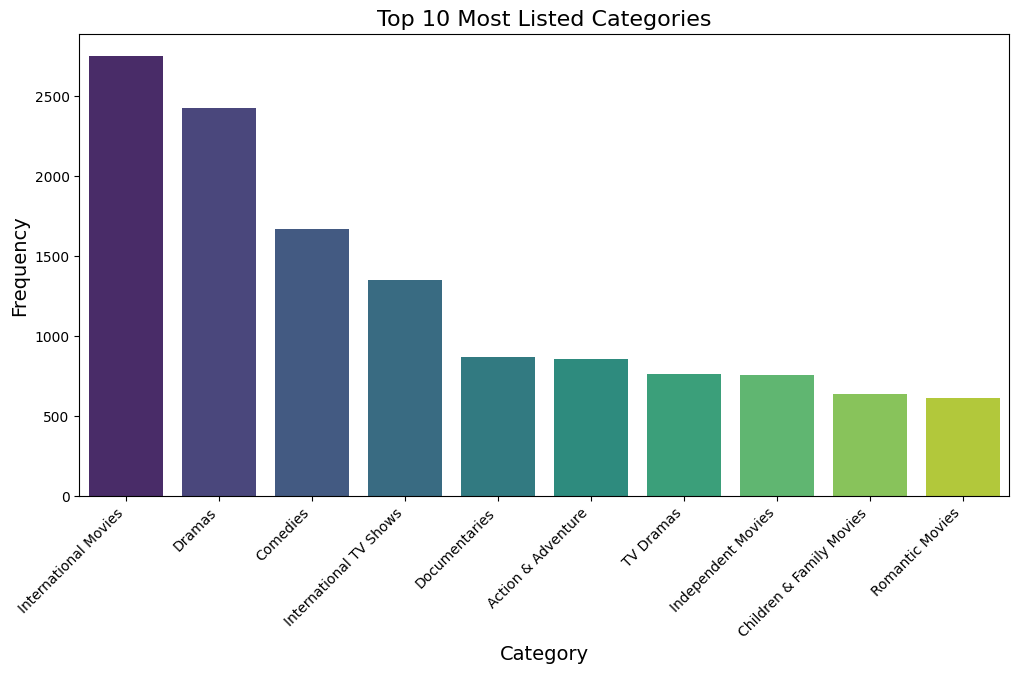

In [86]:
categories = df['listed_in'].str.split(',').explode().str.strip()  
top_10_categories = categories.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')

plt.title('Top 10 Most Listed Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

In [87]:
Horror = df[df["listed_in"].isin(["Horror Movies","Thrillers"])]["release_year"].value_counts()

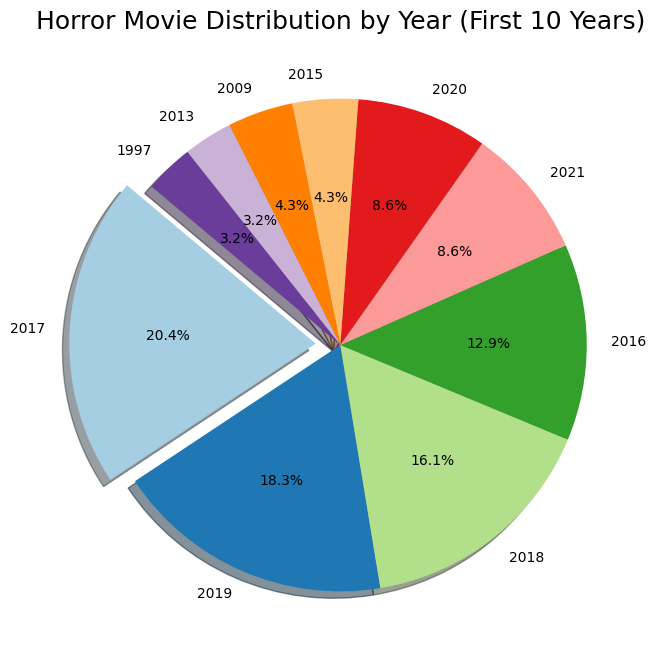

In [88]:
top_10_horror = Horror.sort_values(ascending=False).head(10)

explode = [0.1 if value == top_10_horror.max() else 0 for value in top_10_horror.values]

plt.figure(figsize=(8, 8))
plt.pie(top_10_horror.values, labels=top_10_horror.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.Paired.colors, shadow = 0.6)

plt.title("Horror Movie Distribution by Year (First 10 Years)", fontsize=18)

plt.show()

In [89]:
all_casts = df['cast'].dropna().str.split(',').explode().str.strip()

cast_counts = all_casts.value_counts()

top_10_casts = cast_counts.head(10)

top_10_casts

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64

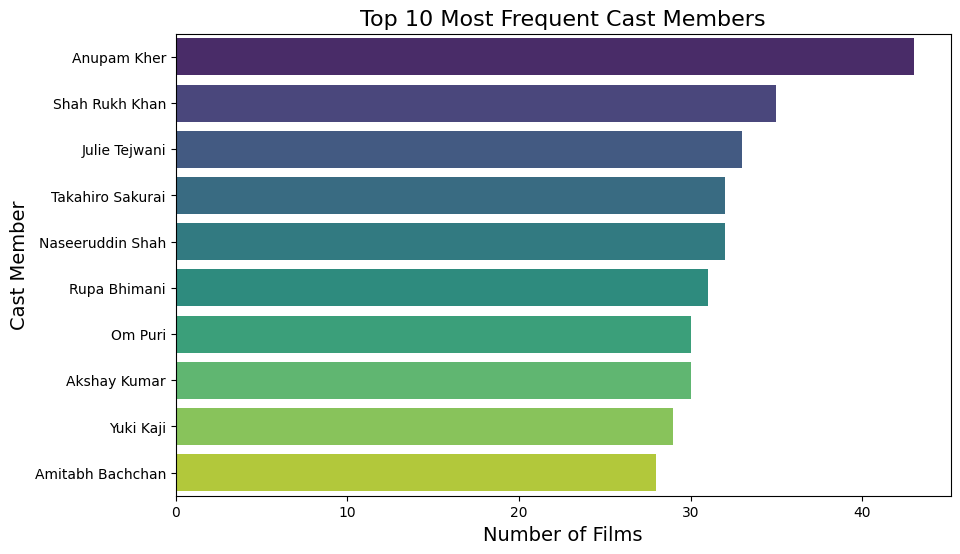

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_casts.values, y=top_10_casts.index, palette='viridis')

plt.title('Top 10 Most Frequent Cast Members', fontsize=16)
plt.xlabel('Number of Films', fontsize=14)
plt.ylabel('Cast Member', fontsize=14)


plt.show()

In [94]:
from wordcloud import WordCloud
import re

In [95]:
descriptions = df['description'].dropna().astype(str)

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)  
    text = text.lower()  
    return text


cleaned_descriptions = descriptions.apply(clean_text)

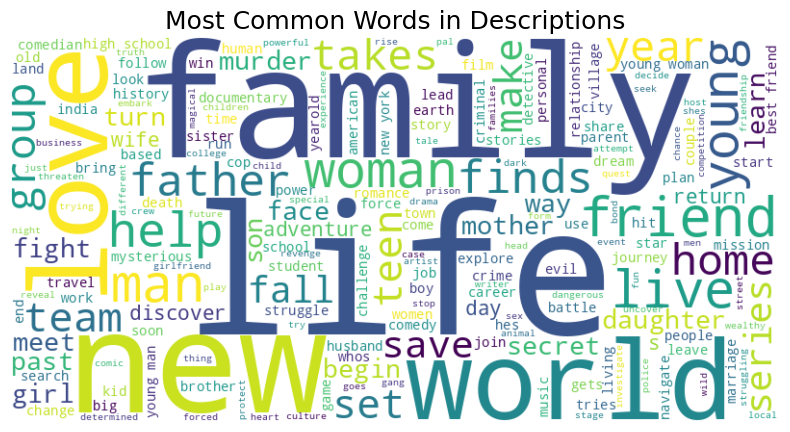

In [63]:
wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color='white', width=800, height=400).generate(' '.join(cleaned_descriptions))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Most Common Words in Descriptions', fontsize=18)
plt.show()

# 🚀 **Data Analysis Summary**

## 🔍 **What We Did:**

#### - 📊 **We provided information about our dataset**  
#### - 🛠️ **We imported our libraries**  
#### - 📂 **We called our dataset and looked at its info**  
#### - 💡 **We saw the missing values ​​in the heatmap**  
#### - 🎬 **We saw the distribution of TV-Show and Movies in the countplot and piechart**  
#### - 🎥 **We saw the 10 directors who made the most movies**  
#### - 🌍 **We saw the 10 countries that produced the most content**  
#### - 🌍 **We saw the 10 countries that produce the most content on the map with their numbers**
#### - 📅 **We saw the rise of TV shows and movies broadcasted every year**  
#### - 📈 **We saw the series and movies added to Netflix every year**  
#### - 🎯 **We saw the top 10 of the most broadcasted categories**  
#### - 😱 **We looked at the number of horror and thriller productions in the last 10 years**
#### - 🌟 **We looked at the top 10 of the actors who played the most**  
#### - 📝 **We showed the most words in the description section with the wordcloud library**  


---

### **Conclusion**  
#### 🎉 **Our analysis provided valuable insights into the dataset, showing trends in genres, countries, actors, and more!**

## 👨‍🏫 **This Dataset Was Created For Educational Purposes**

## 🧑‍🤝‍🧑 **Contributors:**

The analysis and exploration of this dataset was carried out by the following team members:

#### - 🧑‍💻 **https://www.kaggle.com/ozanmhrc**  
#### - 🧑‍💻 **https://www.kaggle.com/zeripek**  
#### - 🧑‍💻 **https://www.kaggle.com/ensrgl**  
#### - 🧑‍💻**https://www.kaggle.com/abdullahkse** 
#### - 🧑‍💻**https://www.kaggle.com/gaygisizsoegov** 
#### - 👩‍💻 **https://www.kaggle.com/masidekabakci**   
#### - 👩‍💻 **https://www.kaggle.com/hanifesin**  
#### - 👨‍💻 **https://www.kaggle.com/fatmayerlikayazkurt**   
#### - 👩‍💻 **https://www.kaggle.com/nuriyedezcan**   
#### - 👩‍💻 **https://www.kaggle.com/tubyco89**   
#### - 👩‍💻 **https://www.kaggle.com/semakurt** 
#### - 👩‍💻 **https://www.kaggle.com/teacherbabur** 

---

#### ✨ **Thanks to their contributions, we were able to dive deep into the dataset and uncover meaningful insights!**